In [27]:
# Kristina (temp code)
# pollution correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
df_CO_pollution = pd.read_csv('carbon-monoxide-results-20181007-145932.csv')
df_CO_pollution['date_local'] = pd.to_datetime(df_CO_pollution['date_local'], format="%Y-%m-%d")
df_CO_pollution['location'] = df_CO_pollution['latitude'].astype(str) +','+  df_CO_pollution["longitude"].astype(str)

In [9]:
df_CO_pollution_subset = df_CO_pollution[['date_local', 'arithmetic_mean']]
df_CO_pollution_subset.head()

,date_local,arithmetic_mean
0,2002-09-09,0.987500
1,2001-01-26,1.016667
2,1999-01-31,0.758333
3,2002-02-19,0.991304
4,2005-07-15,0.583333


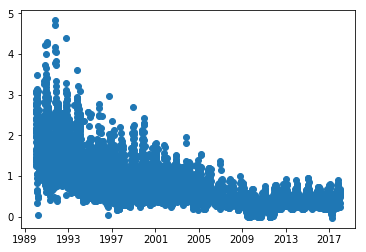

In [13]:
plt.plot_date(df_CO_pollution_subset['date_local'], df_CO_pollution_subset['arithmetic_mean'])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_CO_pollution_subset['date_local'], df_CO_pollution_subset['arithmetic_mean'].values, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train.as_matrix().reshape(-1, 1), y_train)

/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
y_pred = regr.predict(X_test.as_matrix().reshape(-1,1))

/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.14168526196457668

In [26]:
df_CO_pollution.dtypes

state_code                      int64
county_code                     int64
site_num                        int64
parameter_code                  int64
poc                             int64
latitude                      float64
longitude                     float64
datum                          object
parameter_name                 object
sample_duration                object
pollutant_standard             object
date_local             datetime64[ns]
units_of_measure               object
event_type                     object
observation_count               int64
observation_percent           float64
arithmetic_mean               float64
first_max_value               float64
first_max_hour                  int64
aqi                           float64
method_code                   float64
method_name                    object
local_site_name                object
address                        object
state_name                     object
county_name                    object
city_name   